## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [2]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y,yp):
    """
    請完成這個 Function 後往下執行
    """
    mse=sum((y-yp)**2)/len(y)
    return mse

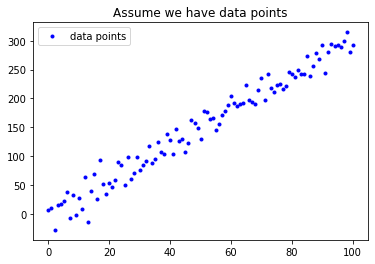

In [16]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

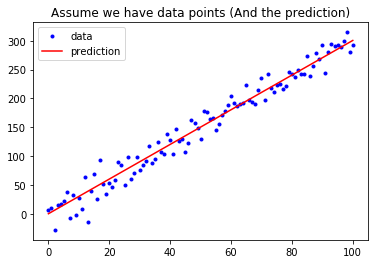

In [17]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [18]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 277.872
The Mean absolute error is 13.372


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

1. 你選的這組資料為何重要
新型冠狀肺炎蔓延全球，了解各國病發數據，可從數據分析好發族群或是潛在感染源，進而調整防疫措施

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)
資料由Johns Hopkins University整理提供，數據來源包含各國報紙與各國衛生署統計

3. 蒐集而來的資料型態為何
數字、國家、日期

4. 這組資料想解決的問題如何評估
對應感染數據，提供政府與人民隨時調整防疫政策

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)
a.乘車者聚集地點搭配司機聚集地點
b.乘客可否共乘，路線順路?
c.乘客乘車體驗調查，了解乘客於乘車時對什麼事物最在意 ex.司機服務、整潔度、速度等
d.安全性

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)
a.過去一年乘客叫車地點蒐集
b.過去一年乘客叫車時間
c.乘客乘車問卷心得
3. 蒐集而來的資料型態為何
a.地點
b.時間
c.類別選項

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
比較實施政策前後乘客率與滿意度